In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("StreamingHistory0.csv")
data['endTime'] = pd.to_datetime(data["endTime"])
data

,endTime,artistName,trackName,msPlayed
0,2022-10-25 21:52:00,OneRepublic,Start Again (feat. Logic),24568
1,2022-10-25 23:17:00,Train,"Hey, Soul Sister",151917
2,2022-10-26 02:08:00,American Authors,I'm Born To Run,80860
3,2022-10-26 03:13:00,American Authors,I'm Born To Run,280300
4,2022-10-26 03:15:00,Kardinal Offishall,Due Me A Favour,141857
...,...,...,...,...
9995,2023-03-08 08:05:00,Arden Jones,SMILE,161000
9996,2023-03-08 08:08:00,Marshmello,Silence,180822
9997,2023-03-08 08:12:00,Tjuvjakt,Tandtråd,242320
9998,2023-03-08 08:16:00,Ekipa,Chill,265135


In [4]:
new_data=data[['endTime']]
new_data['timestamp']=new_data['endTime']
new_data = new_data.drop('endTime', axis=1)
new_data

C:\Users\dfs1s\AppData\Local\Temp\ipykernel_12664\158697907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['timestamp']=new_data['endTime']


,timestamp
0,2022-10-25 21:52:00
1,2022-10-25 23:17:00
2,2022-10-26 02:08:00
3,2022-10-26 03:13:00
4,2022-10-26 03:15:00
...,...
9995,2023-03-08 08:05:00
9996,2023-03-08 08:08:00
9997,2023-03-08 08:12:00
9998,2023-03-08 08:16:00


In [5]:
data_b = pd.read_csv("profWB_timestamps.csv")
data_b["timestamp"]=pd.to_datetime(data_b["timestamp"])
data_b = data_b.sort_values(by='timestamp', ascending=True)
data_b = data_b.drop('Unnamed: 0', axis=1)
data_b

,timestamp
0,2022-11-06 01:53:35+00:00
1,2022-11-06 01:54:37+00:00
2,2022-11-10 19:44:53+00:00
3,2022-11-28 20:30:12+00:00
4,2022-12-01 17:57:23+00:00
...,...
209,2023-11-15 18:12:54+00:00
210,2023-11-15 18:14:31+00:00
211,2023-11-15 18:15:59+00:00
212,2023-11-15 22:39:00+00:00


In [6]:
data_b['diff']=data_b["timestamp"].diff()

In [7]:
data_b

,timestamp,diff
0,2022-11-06 01:53:35+00:00,NaT
1,2022-11-06 01:54:37+00:00,0 days 00:01:02
2,2022-11-10 19:44:53+00:00,4 days 17:50:16
3,2022-11-28 20:30:12+00:00,18 days 00:45:19
4,2022-12-01 17:57:23+00:00,2 days 21:27:11
...,...,...
209,2023-11-15 18:12:54+00:00,0 days 00:01:04
210,2023-11-15 18:14:31+00:00,0 days 00:01:37
211,2023-11-15 18:15:59+00:00,0 days 00:01:28
212,2023-11-15 22:39:00+00:00,0 days 04:23:01


In [8]:
print("The longest time between timestamps is " + str(data_b["diff"].max()))

The longest time between timestamps is 27 days 17:59:27


In [9]:
print("The average time between timestamps is " + str(data_b["diff"].mean()))

The average time between timestamps is 1 days 18:26:05.596244131


In [10]:
data_b["day"] = data_b["timestamp"].dt.date
date_max=data_b["day"].mode().max()
date_count=data_b['day'].value_counts().max()

In [11]:
print("The day with the most timestamps is " + str(date_max) + " with a count of " + str(date_count))

The day with the most timestamps is 2023-04-21 with a count of 10


In [12]:
data_b["month"] = data_b["timestamp"].dt.month
month_max=data_b["month"].mode().max()
month_count = data_b['month'].value_counts().max()

In [18]:
print("The month with the most timestamps is " + str(month_max) + " (October) with a count of " + str(month_count))

The month with the most timestamps is 10 (October) with a count of 45


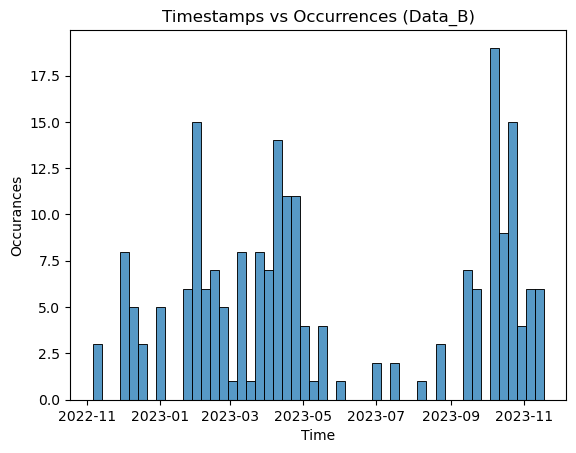

In [14]:
sns.histplot(data_b['timestamp'], bins=50)
plt.xlabel('Time')
plt.ylabel('Occurances')
plt.title('Timestamps vs Occurrences (Data_B)')
plt.show()

I wonder if this dataset has something to do with the accademics, or with school. There is a lot of action around February, May, and November, but there is not a lot, if any, action durring the summer months. My initial guess was canvas, but I imagine Canvas would be used a whole lot more than 214 times a year, but that's only me. A little more data about this would be helpful, perhaps info like if this is the only time period, or if we had another row of data would prove useful as well. 

In [15]:
merged_df = pd.concat([new_data, data_b], ignore_index=True)
merged_df


,timestamp,diff,day,month
0,2022-10-25 21:52:00,NaT,NaN,NaN
1,2022-10-25 23:17:00,NaT,NaN,NaN
2,2022-10-26 02:08:00,NaT,NaN,NaN
3,2022-10-26 03:13:00,NaT,NaN,NaN
4,2022-10-26 03:15:00,NaT,NaN,NaN
...,...,...,...,...
10209,2023-11-15 18:12:54+00:00,0 days 00:01:04,2023-11-15,11.0
10210,2023-11-15 18:14:31+00:00,0 days 00:01:37,2023-11-15,11.0
10211,2023-11-15 18:15:59+00:00,0 days 00:01:28,2023-11-15,11.0
10212,2023-11-15 22:39:00+00:00,0 days 04:23:01,2023-11-15,11.0


In [16]:
merge=pd.merge(new_data, data_b, left_index=True, right_index=True, how='outer')
merge

,timestamp_x,timestamp_y,diff,day,month
0,2022-10-25 21:52:00,2022-11-06 01:53:35+00:00,NaT,2022-11-06,11.0
1,2022-10-25 23:17:00,2022-11-06 01:54:37+00:00,0 days 00:01:02,2022-11-06,11.0
2,2022-10-26 02:08:00,2022-11-10 19:44:53+00:00,4 days 17:50:16,2022-11-10,11.0
3,2022-10-26 03:13:00,2022-11-28 20:30:12+00:00,18 days 00:45:19,2022-11-28,11.0
4,2022-10-26 03:15:00,2022-12-01 17:57:23+00:00,2 days 21:27:11,2022-12-01,12.0
...,...,...,...,...,...
9995,2023-03-08 08:05:00,NaT,NaT,NaN,NaN
9996,2023-03-08 08:08:00,NaT,NaT,NaN,NaN
9997,2023-03-08 08:12:00,NaT,NaT,NaN,NaN
9998,2023-03-08 08:16:00,NaT,NaT,NaN,NaN


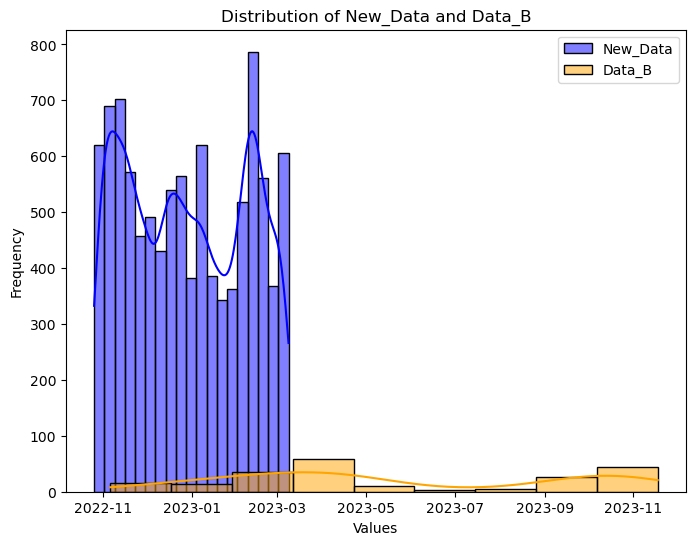

In [17]:
plt.figure(figsize=(8, 6))

sns.histplot(data=merge['timestamp_x'], kde=True, color='blue', label='New_Data')
sns.histplot(data=merge['timestamp_y'], kde=True, color='orange', label='Data_B')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of New_Data and Data_B')
plt.legend()

plt.show()

Part 4

The selected data is from Spotify ranging between the dates 2022-10-25 and 2023-03-08. One question I have is with the given data, who is my favorate artist to listen to? And what about my most played some? I am curious to see if my most played song is by the most played artist. Additionally, another question I have is which day did I listen to what artist the most? Or which songs did I play on repeat many times over?

In [30]:
song_data=data.copy()
song_data['Times Played']= song_data.groupby(['artistName', 'trackName'])['trackName'].transform('count')
#data['Artist Count'] = data.groupby(['artistName', 'trackName'])['artistName'].transform('count')
song_data = song_data.sort_values(by='Times Played', ascending=False)
song_data = song_data.drop_duplicates(subset=['trackName'])
top_songs=song_data.head(20)
top_songs

,endTime,artistName,trackName,msPlayed,Times Played
3115,2022-11-30 23:17:00,Ying Yang Twins,Badd,18190,65
1499,2022-11-10 00:25:00,Snoop Dogg,"Young, Wild & Free (feat. Bruno Mars)",3250,45
8091,2023-02-11 16:18:00,WildVibes,Under Tonight,177738,39
336,2022-10-30 03:30:00,Creed,With Arms Wide Open,455489,38
9301,2023-02-28 11:24:00,Vance Joy,Riptide,204280,35
8096,2023-02-11 16:31:00,Khalid,Young Dumb & Broke,186814,33
9083,2023-02-23 20:33:00,Kid Cudi,Pursuit Of Happiness (Nightmare),295293,32
6391,2023-01-18 06:08:00,X Ambassadors,Renegades,195200,32
2843,2022-11-26 16:52:00,Bingo Players,Get Up (Rattle),89759,31
2859,2022-11-26 19:42:00,Kygo,Stole the Show,223186,31


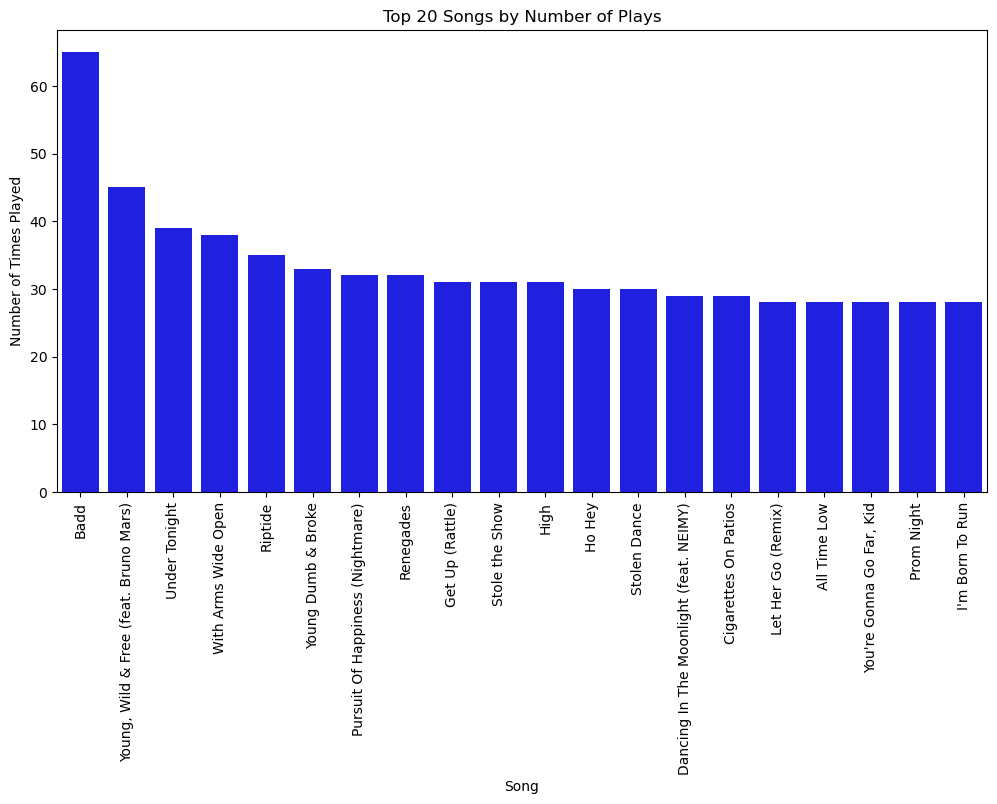

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='trackName', y='Times Played', data=top_songs, color='blue')
plt.xlabel('Song')
plt.ylabel('Number of Times Played')
plt.title('Top 20 Songs by Number of Plays')
plt.xticks(rotation=90)
plt.show()

In [32]:
artist_data=data.copy()
artist_data['Times Played'] = artist_data.groupby(['artistName', 'trackName'])['artistName'].transform('count')
artist_data = artist_data.sort_values(by='Times Played', ascending=False)
artist_data = artist_data.drop_duplicates(subset=['artistName'])
top_artists=artist_data.head(20)
top_artists

,endTime,artistName,trackName,msPlayed,Times Played
3115,2022-11-30 23:17:00,Ying Yang Twins,Badd,18190,65
1499,2022-11-10 00:25:00,Snoop Dogg,"Young, Wild & Free (feat. Bruno Mars)",3250,45
8091,2023-02-11 16:18:00,WildVibes,Under Tonight,177738,39
336,2022-10-30 03:30:00,Creed,With Arms Wide Open,455489,38
9301,2023-02-28 11:24:00,Vance Joy,Riptide,204280,35
8096,2023-02-11 16:31:00,Khalid,Young Dumb & Broke,186814,33
9083,2023-02-23 20:33:00,Kid Cudi,Pursuit Of Happiness (Nightmare),295293,32
6391,2023-01-18 06:08:00,X Ambassadors,Renegades,195200,32
2843,2022-11-26 16:52:00,Bingo Players,Get Up (Rattle),89759,31
2859,2022-11-26 19:42:00,Kygo,Stole the Show,223186,31


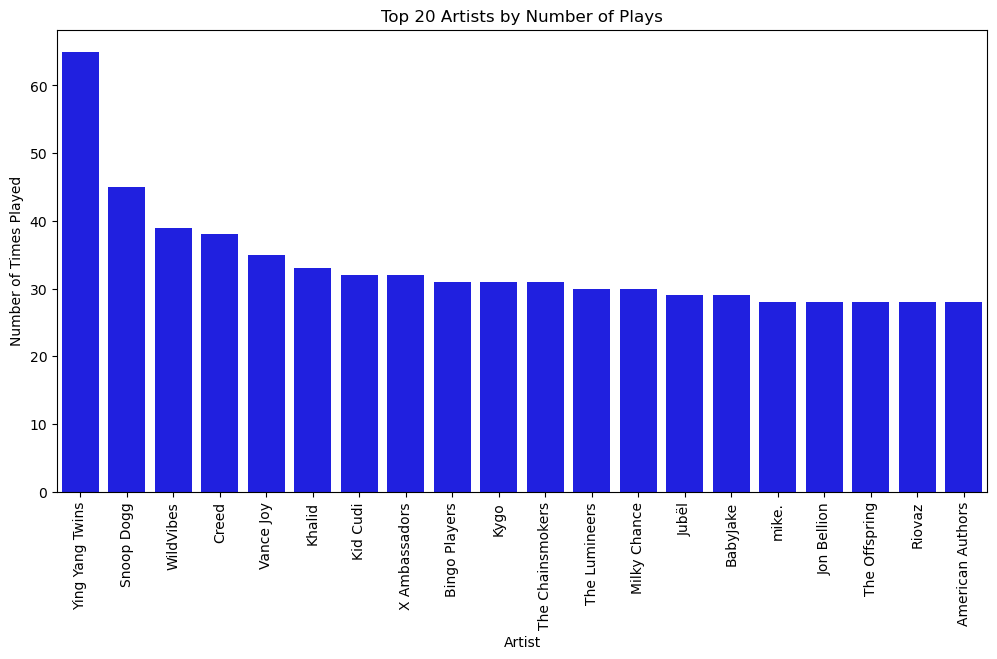

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x='artistName', y='Times Played', data=top_artists, color='blue')
plt.xlabel('Artist')
plt.ylabel('Number of Times Played')
plt.title('Top 20 Artists by Number of Plays')
plt.xticks(rotation=90)
plt.show()